In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from itertools import chain
from functools import partial
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm
import pickle

In [3]:
from evolving_comm_network import *

In [4]:
#plt.rcParams["animation.html"] = "jshtml"

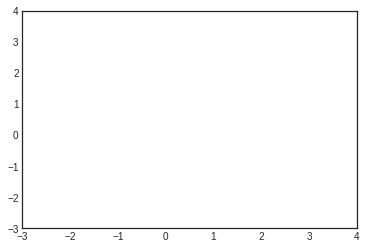

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3, 4), ylim=(-3, 4))
particles_d, = ax.plot([], [], 'bo', ms=2)
particles_c, = ax.plot([], [], 'ro', ms=2)
#parents, = ax.plot([], [], 'ro', ms=4)

# initialization function: plot the background of each frame
def init():
    particles_c.set_data([], [])
    particles_d.set_data([], [])
    #parents.set_data([], [])
    return particles_c,particles_d

# animation function.  This is called sequentially
def animate(i):
    global locs,loc_c,loc_d
    x_c = [z[0] for z in loc_c[i]]
    y_c = [z[1] for z in loc_c[i]]
    particles_c.set_data(x_c,y_c)
    x_d = [z[0] for z in loc_d[i]]
    y_d = [z[1] for z in loc_d[i]]
    particles_d.set_data(x_d,y_d)
    return particles_c,particles_d

In [6]:
PD1 = Simulation_PD(25, 20, bernoulli_arms, discounted_thompson, 1000, False, True, 1)

In [7]:
locs,loc_c,loc_d, size_cluster, coop_ratios = PD1.plot_data_mult_gen(True, 0.01)

Progress: [#######----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KeyboardInterrupt: 

In [ ]:
#print (size_cluster)

clusters = np.array([list(i) for i in size_cluster])
coops = np.array([list(i) for i in coop_ratios])

#print (clusters)

In [ ]:
def plot_density(ptraj, tlist, ustep=10, ax=None):
    dist = np.zeros((ustep-1,ptraj.shape[1]))
    bin_min, bin_max = ptraj.min(), ptraj.max()
    bins = np.linspace(bin_min, bin_max, ustep)
        
    for t, traits in enumerate(ptraj.transpose()):
        dist[:,t], _ = np.histogram(traits, bins=bins)

    if ax is None:
        fig,ax = plt.subplots(1,1,figsize=(20,5))
    dmask = dist
    dmask[dmask==0] = np.nan
    mp = ax.imshow(dmask,aspect='auto', 
                   extent=[tlist.min(),tlist.max(),bin_min, bin_max],
                   cmap='viridis',
                   origin='bottom')
    ax.set(xlabel='Time',ylabel='Trait')
    cax = make_axes_locatable(ax).append_axes("right", size="1%", pad=0.1)
    ax.get_figure().colorbar(label='density', cax=cax, ax=ax, mappable=mp)

In [ ]:
t_list = [i for i in range(1,1001)]
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(clusters[t-1]))],clusters[t-1],marker='o', s=2, color='k')
plt.ylabel('Group size')
plt.xlabel('Time')
plt.title('Evolution of group size')
plt.show()

plt.clf()
plt.figure()
for t in t_list:
    plt.scatter([t for i in range(len(coops[t-1]))],coops[t-1], marker='o', s=2, color='k')
plt.ylabel('Coop ratios')
plt.xlabel('Time')
plt.title('Evolution of coop ratios')
plt.show()

In [ ]:
t = np.array([i for i in range(1,16)])

plot_density(clusters,t)

In [ ]:
import pickle

with open('file.txt', 'wb') as handle:
    pickle.dump(output, handle)

with open('file.txt', 'rb') as handle:
    b = pickle.loads(handle.read())
    
print (b)